In [27]:
#import the necessary libraries for EDA and Feature Engineering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
yb_df=pd.read_csv('data_YesBank_StockPrices.csv', index_col='Date',parse_dates=True)
yb_df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [29]:
#Check for missing values
yb_df.isna().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

# Exploratory Data Analysis

As we can see the above dataset does not contain any missing values. This certifies that the given dataset is consistent and is ready for an for it's first set of EDA to be performed on it.

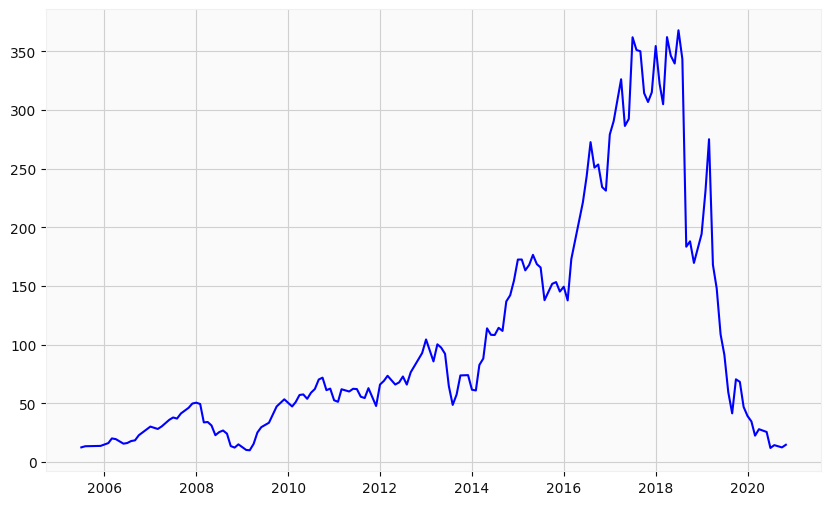

In [30]:
# Plotting the line chart
plt.figure(figsize=(10, 6))  # Set the figure size if needed
plt.plot(yb_df.index, yb_df['Close'], label='Yes Bank Stock Price', color='blue')


The line plot for the given monthly time series data for Yes Bank stock prices can help us make inferences on the trends that the stock was perusing in the period. From the end of 2005 to early 2008 the stock registered a positive outlook and an uptrend. There was a brief downtrend from early 2008 to early 2009 which can be attributed to the 2008 Sub-Prime Crisis- which wreaked havoc in the world stock market. As Yes Bank was in the banking sector it was clearly affected due to this predicament. 

After 2009 there was a persistent uptrend and the margin for short-term speculation increased for Yes Bank ever since the Reserve Bank of India(RBI) addressed its concern about the asset quality and lending practices of the bank. The period shows great volatility for Yes Bank. 

Post-2018 Yes Bank has gone through corporate restructuring and the investor sentiments regarding the fundamentals of the stocks have hit an all-time low. Hence, we saw Yes Bank lose its stock value and market share in this period. And since its loss in market share due to the negative perception built around the companies' fundamentals, it hasn't been able to recover back to its previous high levels.

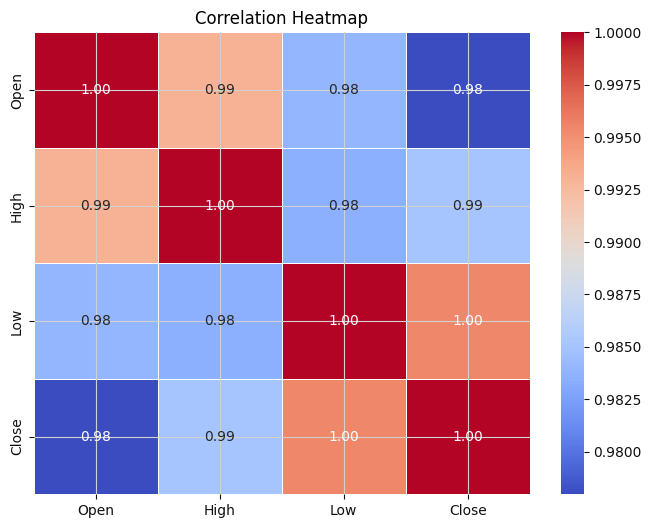

In [31]:
#Plotting the Heatmap to validate trading theories on price action.
correlation_matrix = yb_df.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

The above chart is a correlation heatmap of the <b>Monthly Open, Monthly High, Monthly Low and Monthly Close</b> of the Yes Bank Stock. The positive values and high magnitude of the correlation coefficients describe a positive and high degree of correlation of the given attributes among each other.
The above heatmap falls in line with general financial literature and can be used to validate the nature and the credibility of the financial data.

A heatmap can also be used to identify any potential issues with the data, such as multicollinearity (i.e., high correlation between independent variables).

We may observe from the figure that our data is multicollinear. Because multicollinearity can result in overfitting and erroneous coefficient estimations, it can provide challenges for linear regression. We can determine whether to eliminate a variable or switch to a different machine learning technique that is less sensitive to multicollinearity by finding the variables with strong correlations.

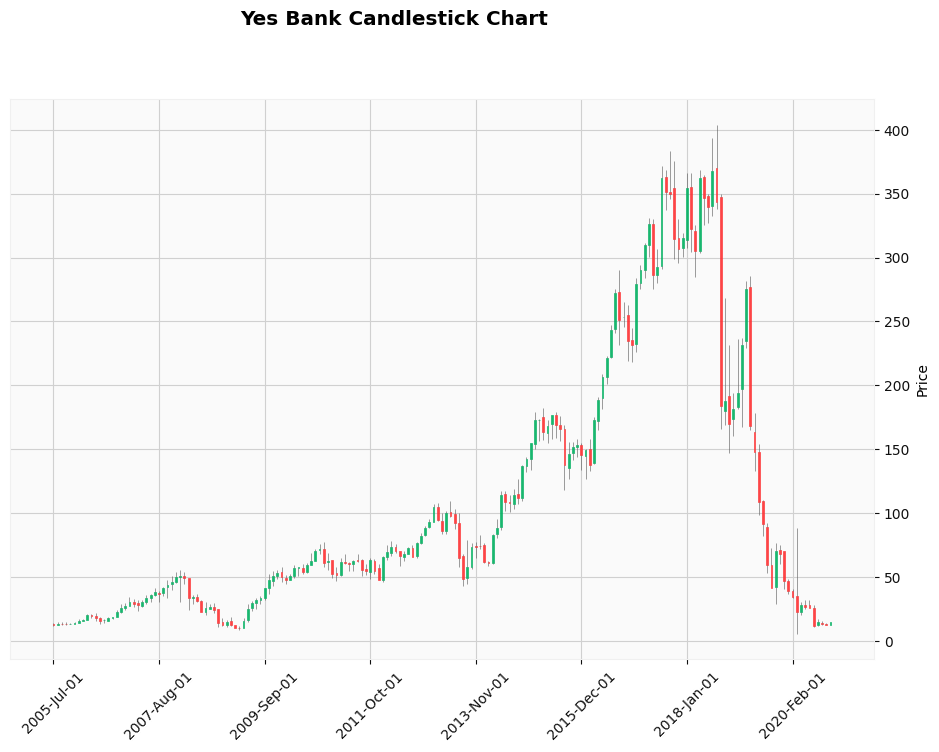

In [32]:
#Plot Candlestick Chart for Yes Bank Stock
import mplfinance as mpf
mpf.plot(yb_df, type='candle', style='yahoo', ylabel='Price', ylabel_lower='Volume', figsize=(12,8), title= 'Yes Bank Candlestick Chart')


A candlestick chart is a financial chart used to represent the price movement of an asset, such as a stock, over a certain period of time. It provides a visual representation of four key price points during that time frame: the opening price, closing price, highest price (high), and lowest price (low). Each time period is typically represented by a single "candlestick," and the chart is composed of a series of these candlesticks.

The representation of the Yes Bank stock price data in the form of candlesticks help us better present the price movements in the stock in terms of the trading and investment domain elucidating the open interest and the price-action on the stock over the period of time. It can help us to eruditely show the general trend of the stock at a given period of time,as well as give us a brief idea of the stocks price position in light of the buying or selling pressure that the stock was experiencing.

# Feature Engineering

Feature engineering is the process of transforming raw data into a format that can be effectively utilized by machine learning algorithms. It involves creating new features or modifying existing ones to enhance the performance of a model. Feature engineering is a crucial step in the machine learning pipeline because the quality of features directly impacts the model's ability to learn and make accurate predictions.

In [33]:
yb_df['Intra-month Movement']=yb_df['Close']-yb_df['Open']
yb_df['Price Action Volitility']=yb_df['Intra-month Movement']/(yb_df['High']-yb_df['Low'])
yb_df['Price Action Volitility']=yb_df['Price Action Volitility'].round(2)

In [34]:
yb_df.head()

,Open,High,Low,Close,Intra-month Movement,Price Action Volitility
Date,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,-0.54,-0.20
2005-08-01,12.58,14.88,12.55,13.42,0.84,0.36
2005-09-01,13.48,14.87,12.27,13.30,-0.18,-0.07
2005-10-01,13.20,14.47,12.40,12.99,-0.21,-0.10
2005-11-01,13.35,13.88,12.88,13.41,0.06,0.06


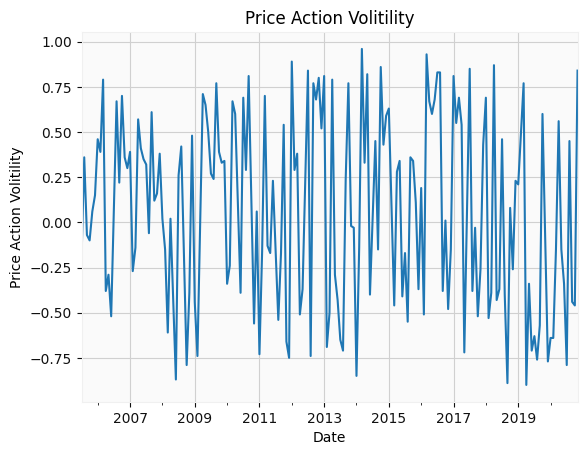

In [35]:
#Chart New Features
# Plot the 'Price Action Volitility'
yb_df['Price Action Volitility'].plot(kind='line', title='Price Action Volitility')
plt.ylabel('Price Action Volitility')
plt.show()

<b>Price Action Volitility</b> represent a normalized measure of the intraday price movement relative to the high-low range for a financial instrument within a trading month(in this case). The feature is a way to express the proportion of intraday movement relative to the high-low range, providing a normalized perspective on the months's price dynamics. In simpler terms, it is a normalised measure of the voilitility faced by the Yes Bank Stock on a mothly basis in the stock market.

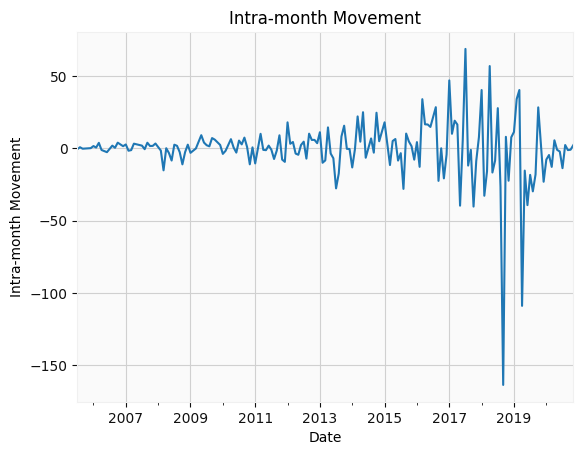

In [37]:
# Plot the 'Intramonth Movement'
yb_df['Intra-month Movement'].plot(kind='line', title='Intra-month Movement')
plt.ylabel('Intra-month Movement')
plt.show()

<b>Intramonth price movement</b> refers to the fluctuation in the price of a financial instrument within a single trading month. It focuses on the price changes that occur during regular trading hours of the entire month, typically from the market open on the first trading day of the month to the market close on the last trading day of the month. Traders and investors closely monitor Intramonth price movements to make decisions about buying or selling financial assets. Intramonth price charts display the highs, lows, opening, and closing prices for each time interval (e.g. week, day, hour etc.) throughout the trading month. <i><b>Analyzing intramonth price movements can help identify trends, patterns, and potential trading opportunities.</i></b>

# Model Selection

# <b>Model 1: Linear Regression Model

In [12]:
#Import Sci-kit Learn and it's necessary Modules for Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

A linear regression model is a statistical method used for predicting the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. The model assumes a linear association, representing the straight-line relationship between variables. It calculates coefficients that minimize the difference between predicted and actual values, allowing for the estimation of the dependent variable based on the given independent variables. 
In the case of the Yes Bank stock price, we take the closing price or the price of the stock in a given month as the dependent variable and use the other variables namely, Open Price, Low, Close and the two new created features of Intraday Movement and Price Action Volitility as the independent features. 
Here we try to create the best fit hyper-plane, that reduces the training error and hopefully does a decent job in predicting the Stock Prices for the test variables with falling into the realm of overfitting.

<b>Perform Train-Test Split

Train-test split is the technique in machine learning where a dataset is divided into two subsets: a training set used to train a model, and a testing set to evaluate its performance. This separation helps assess how well the model generalizes to new, unseen data, preventing overfitting and providing reliable performance metrics.

In [24]:
from sklearn.model_selection import train_test_split
X = yb_df.drop('Close', axis=1)
y = yb_df['Close']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
# Create a Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg.predict(X_test)

# Evaluation Metrics

<b>Mean Squared Error (MSE)</b> measures the average squared difference between predicted and actual values in a regression model, providing a quantitative assessment of model accuracy.

<b>R-squared score</b>, or coefficient of determination, quantifies the proportion of variance in the dependent variable explained by the model, with a higher value indicating better fit.

In [28]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

Mean Squared Error: 0.00
R-squared Score: 1.00


<b>Linear regression model</b> has a Mean Squared Error (MSE) of 0.00, it indicates that the model perfectly predicts the observed data points, with no errors in its predictions. Each predicted value exactly matches the corresponding actual value.

<b>R-squared score</b> of 1.00 signifies that the model explains 100% of the variance in the dependent variable. In other words, the model perfectly captures the variability in the data, and all data points fall exactly on the regression line. This is an ideal scenario, suggesting an excellent fit of the model to the data

# <b>Model 2: Random Forest Regressor
    

The Random Forest Regressor is an ensemble machine learning model that combines multiple decision trees to make accurate predictions. It aggregates the predictions of individual trees to improve overall accuracy and robustness. In the case of the Yes Bank data set we run multiple decision tree regressors and try and estimate the price of stock. This is intially done in the training phase and then shifted to the testing phase for price prediction of the Yes Bank Stock. 

In [57]:
#Import Sci-kit Learn and it's necessary Modules for Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor

In [96]:
# Create a Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_reg.predict(X_test)

In [97]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [98]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

Mean Squared Error: 276.32
R-squared Score: 0.97


The <b>Mean Squared Error (MSE)</b> of 276.32 for a Random Forest Regressor indicates, on average, the squared difference between the predicted and actual values is 276.32 units. The interpretation of MSE is similar to that in linear regression, and a lower value suggests better performance.

<b>R-squared score</b> of 0.97 suggests that approximately 97% of the variance in the dependent variable is explained by the Random Forest Regressor. This high R-squared value indicates strong predictive power, suggesting that the Random Forest model captures a significant portion of the data's variability and performs well in making predictions.

# <b> Model 3: Support Vector Regressor

A <b>Support Vector Regressor</b> is a machine learning algorithm used for regression tasks, which involves predicting a continuous output variable. SVR is based on the principles of Support Vector Machines (SVM), it's goal is to find a hyperplane in a high-dimensional space that best represents the relationship between input features and the corresponding output values. The term "support vector" refers to the data points that are most critical for determining the optimal hyperplane. The algorithm aims to minimize the error between the predicted values and the actual target values while maintaining a margin of tolerance.

Here in the case of the Yes Bank Dataset the SVR aims to predict the price of the stocks for the bank using the regression algorithm of support vector machine and looks to minimise the mean squared error and achieve a good R-squared Score.

In [99]:
#Import Sci-kit Learn and it's necessary Modules for Support Vector Regressor Model
from sklearn.svm import SVR

In [100]:
# Create a Support Vector Regressor
svm_reg = SVR(kernel='linear')  # You can choose different kernels, e.g., 'linear', 'rbf', 'poly', etc.

# Train the model
svm_reg.fit(X_train, y_train.ravel())

# Make predictions on the test set
y_pred = svm_reg.predict(X_test)

In [101]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

Mean Squared Error: 0.00
R-squared Score: 1.00


For a Support Vector Regressor (SVR) model with a <b>Mean Squared Error (MSE)</b> of 0.00, it suggests that the predictions perfectly match the actual values, resulting in no errors. Each predicted value exactly aligns with its corresponding actual value.

An <b>R-squared score</b> of 1.00 indicates that the SVR model explains 100% of the variance in the dependent variable. In other words, the model perfectly captures the variability in the data, and all data points fall precisely on the regression line. This scenario suggests an ideal fit of the SVR model to the data, demonstrating excellent predictive performance.

# Ensemble Learning

Ensemble Learning is a machine learning technique that combines predictions from multiple models to improve overall performance. It aims to enhance accuracy, robustness, and generalization by leveraging the strengths of diverse individual models. Ensemble methods include techniques like bagging, boosting, and stacking, which strategically combine predictions from multiple base models to achieve superior results compared to individual models.

Ensemble learning leverages the strength of multiple models to enhance overall predictive performance. Instead of relying on a single model, ensemble methods combine the predictions of multiple diverse models to obtain a more accurate and robust outcome. 

# Model 1:Voting Regressor

Voting Regressor is an ensemble learning technique employed for regression tasks, where multiple individual regression models collaborate to enhance predictive performance.

### Key Concepts:

- **Aggregation of Predictions:**
  Voting Regressor combines predictions from multiple base regression models to create a more robust and accurate final prediction.

- **Hard Voting and Soft Voting:**
  - *Hard Voting Regressor:* It aggregates predictions through a majority vote, where the final prediction is the average output of the individual models.
  - *Soft Voting Regressor:* It computes the final prediction as a weighted average of the predictions, considering the confidence or reliability of each model.

- **Diverse Base Regressors:**
  The ensemble can include various regression algorithms, such as linear regression, decision trees, or support vector machines, offering a diverse set of modeling approaches.

### Advantages:

- **Improved Robustness:**
  By combining predictions from different models, Voting Regressor can mitigate the weaknesses of individual models, leading to a more robust overall performance.

- **Versatility:**
  It can be applied with different regression algorithms, allowing flexibility in model selection.

### Considerations:

- **Correlated Models:**
  If the base models are highly correlated, the ensemble may not achieve optimal performance. Including diverse models is beneficial.

- **Hyperparameter Tuning:**
  Tuning hyperparameters of individual models and considering their impact on the ensemble can enhance predictive accuracy.



In [102]:
from sklearn.ensemble import VotingRegressor

In [103]:
# Create the ensemble model using VotingRegressor
ensemble_model = VotingRegressor([('linear', linear_reg), ('rf', rf_reg), ('svm', svm_reg)])

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ensemble = ensemble_model.predict(X_test)


In [104]:
# Evaluate the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print(f'Ensemble Model Mean Squared Error: {mse_ensemble:.2f}')
print(f'Ensemble Model R-squared Score: {r2_ensemble:.2f}')

Ensemble Model Mean Squared Error: 30.74
Ensemble Model R-squared Score: 1.00


### Voting Regressor Model Evaluation

#### Mean Squared Error (MSE):
The Mean Squared Error is a measure of the average squared difference between the predicted values and the actual values. In the context of the ensemble model, the MSE of 30.74 indicates the average squared deviation of the predictions from the true values. Lower MSE values are desirable, and in this case, the model has relatively low prediction errors.

#### R-squared Score:
The R-squared score, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A perfect R-squared score is 1.00, indicating that the model perfectly predicts the variability of the target variable. In this scenario, the ensemble model has achieved a perfect R-squared score of 1.00, suggesting an excellent fit to the data and a high level of predictive accuracy.

These evaluation metrics collectively suggest that the voting regressor ensemble model is performing very well, with low prediction errors (MSE) and a perfect fit to the data (R-squared score).


# Model 2: Gradient Boosting Regressor

Gradient Boosting Regressor is an ensemble learning technique used for regression tasks. It builds a predictive model by combining the predictions of multiple weak learners, typically decision trees, in a sequential manner.

### Key Concepts:

- **Sequential Training:**
  Gradient Boosting works sequentially, with each weak learner attempting to correct the errors made by the previous ones. New models are trained to predict the residuals (differences between predicted and actual values) of the ensemble.

- **Weak Learners (Decision Trees):**
  The base models, often decision trees, are referred to as weak learners. These trees are typically shallow to avoid overfitting, and each one contributes a small improvement to the overall predictive performance.

- **Gradient Descent Optimization:**
  The algorithm minimizes a loss function by using gradient descent. It adjusts the parameters of each weak learner to reduce the errors in predicting the target variable.

- **Combining Predictions:**
  The final prediction is a weighted sum of the predictions from all weak learners. The weights are determined during the training process, emphasizing the contribution of each model based on its performance.

### Advantages:

- **High Predictive Accuracy:**
  Gradient Boosting tends to provide high accuracy by iteratively improving the model's predictions.

- **Handles Non-linear Relationships:**
  It can capture complex non-linear relationships in the data, making it suitable for a wide range of regression problems.

- **Robust to Overfitting:**
  The use of shallow trees and regularization techniques makes Gradient Boosting robust against overfitting.

### Considerations:

- **Computational Intensity:**
  Training a Gradient Boosting model can be computationally intensive, especially with a large number of iterations or deep trees.

- **Hyperparameter Tuning:**
  Proper tuning of hyperparameters is crucial for achieving optimal performance.



In [106]:
from sklearn.ensemble import GradientBoostingRegressor

In [107]:
# Create the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_regressor.fit(X_train, y_train.ravel())

# Make predictions on the test set
y_pred_gb = gb_regressor.predict(X_test)

In [109]:
# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting Mean Squared Error: {mse_gb:.2f}')
print(f'Gradient Boosting R-squared Score: {r2_gb:.2f}')

Gradient Boosting Mean Squared Error: 323.30
Gradient Boosting R-squared Score: 0.97


### Gradient Boosting Model Evaluation

#### Mean Squared Error (MSE):
The Mean Squared Error (MSE) is a measure of the average squared difference between the predicted values and the actual values. In the context of the Gradient Boosting model, the MSE of 323.30 indicates the average squared deviation of the predictions from the true values. Lower MSE values are desirable, and in this case, the model demonstrates relatively low prediction errors.

#### R-squared Score:
The R-squared score, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A perfect R-squared score is 1.00, indicating that the model perfectly predicts the variability of the target variable. Here, the Gradient Boosting model has achieved a high R-squared score of 0.97, suggesting a strong fit to the data and excellent predictive accuracy, capturing 97% of the variance in the target variable.
